# Exploratory Data Analysis of Investment Banks' indices

## Introduction

This amazing image of the Southern Andes is ascribed to **Michal Najjar**

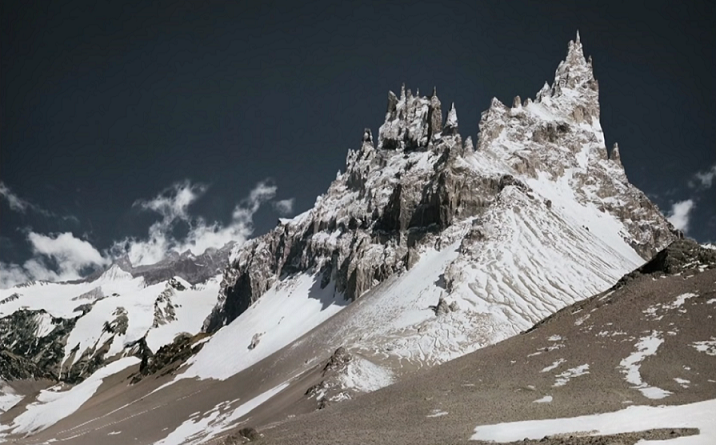

Actually, this image is not all natural. It is a digitally altered image; contours of mountains follow the vissictudes of the Dow Jones Index - and the valley is the ***2008 Financial Crisis***


So here today, we will be looking at how the indices of Big Banks have fared from 2006 to 2019. We will analyse the data of the following banks:
* Bank of America 
* CitiGroup
* Goldman Sachs
* JP Morgan & Chase
* Morgan Stanley
* Wells Fargo


## Importing data and libraries

In [1]:
import pandas as pd
import pandas_datareader as data
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
#Defining the start and end date of share price data
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
#Using Yahoo Finance to collect daily numbers
BAC = data.DataReader('BAC','yahoo',start,end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)

In [4]:
BAC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.749325
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.621654
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.758445
2015-12-30,17.240000,17.040001,17.200001,17.049999,35066400.0,15.548695
2015-12-31,17.070000,16.830000,17.010000,16.830000,47153000.0,15.348064


We have obtained all basic factors to analyse daily share prices.

In [5]:
#Create a list of tickers for each bank
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [6]:
#Lets use pd.concat to concatenate the bank datframes together to a single dataframe called bank_stocks
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.170383  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.195881  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.297882  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.336124  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.731342  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.324865  
2006-01-04  31.530001  10870000.0  20.089125  
2006-01-05  31.495001  10158000.0  20.066822  
2006-01-06  31.680000   8403800.0  20.184694  
2006-01-09  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

In [8]:
#Muti level indexing
#Set the column name levels - Bank  Name & Stock Info
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

# EDA

#### Lets check the max close price for each bank throughout the time period

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

#for tick in tickers:
    #print(tick,bank_stocks[tick]['Close'].max())

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### What do the returns look like for each of these banks?

In [11]:
# Create a new datafame called returns. This dataframe will contain the returns for each bank's stock.
returns = pd.DataFrame()

I'm going to create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [13]:
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.324865
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.089125
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.066822
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.184694
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.181515


In [14]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Lets see the visual representation of these returns and their relation with each other using a pairplot of the returns dataframe. What stands out to you?

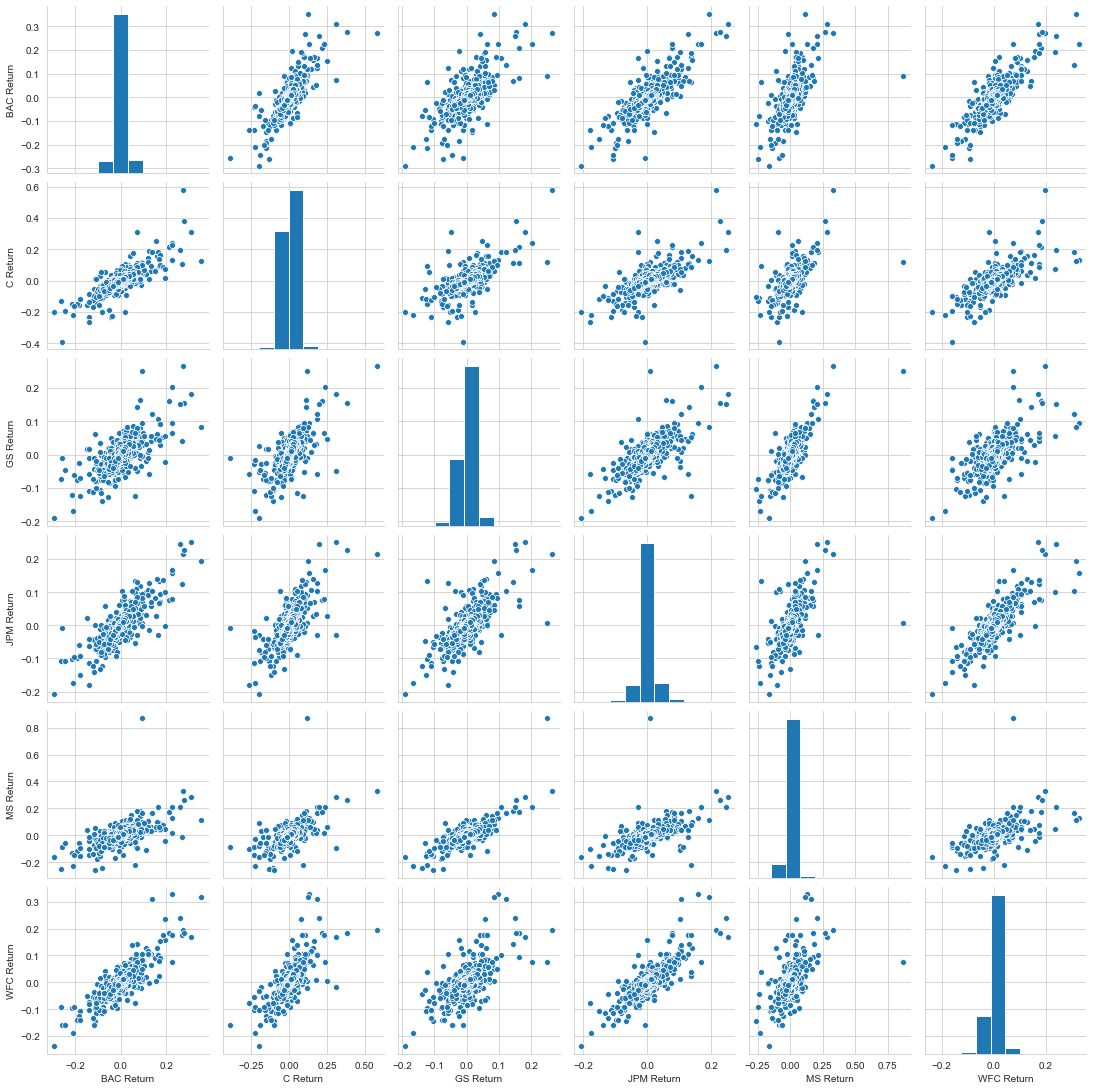

In [15]:
sns.pairplot(returns[1:])

#### Now use the returns dataframe to obtain the best & worst returns of a day, which date do we get?

In [37]:
returns.idxmin()

BAC Return   2009-01-20
GS Return    2009-02-27
C Return     2009-01-20
WFC Return   2009-01-20
MS Return    2008-10-09
JPM Return   2009-01-20
dtype: datetime64[ns]

January 20, 2009 seems like a bad day for the Stock Market. 4 banks had their worst returns that day. It also happens to be Barack Obama's inauguration day. 

Coincidence? I leave that for you to decide.

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

November 24, 2008 gave highest returns to Goldman and Citi investors. If you Google the data, you'll find that government  of United States agreed to infuse capital into CitiGroup this day.

Wells Fargo, Bank of America & J.P. Morgan & Chase also rose by 26-27%.

#### Looking at the standard deviation of returns, we can figure how volatile this stocks are.

In [40]:
returns.std()

BAC Return    0.032158
GS Return     0.033750
C Return      0.022946
WFC Return    0.024401
MS Return     0.033176
JPM Return    0.026551
dtype: float64

I'll check how does this look for 2008 only..

In [42]:
returns.loc['2008-01-01':'2008-12-31',:].std()

BAC Return    0.062934
GS Return     0.073523
C Return      0.050015
WFC Return    0.053134
MS Return     0.087604
JPM Return    0.052439
dtype: float64

During 2007-2008, Morgan Stanley remained the most volatile but overall Goldman takes the top spot.

#### Now creating a distplot using seaborn of 2019 returns of Goldman Sachs

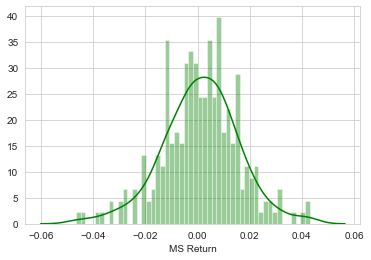

In [43]:
sns.distplot(returns.loc['2019-01-01':'2019-12-31',:]['MS Return'],color='green',bins=50)

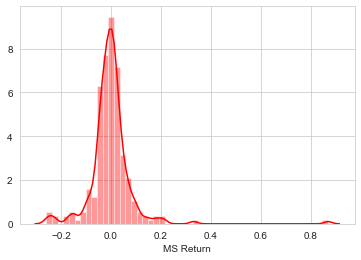

In [44]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31',:]['MS Return'],color='red',bins=50)

The standard deviation goes to 0.8 in 2008 whereas in 2019 its 0.05.

## More Visualizations

#### Lets create a line plot showing close price for each bank for the entire index of time

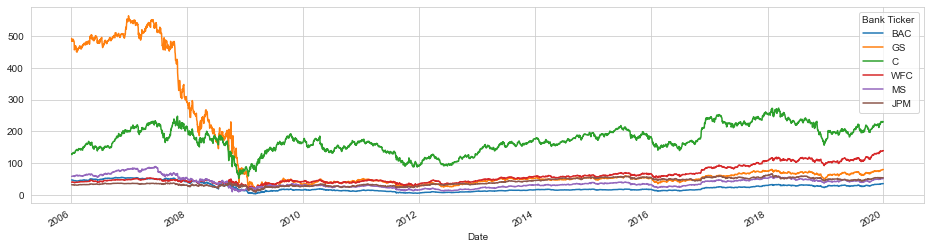

In [55]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(16,4))

#for tick in tickers:
#    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))

### Moving Averages

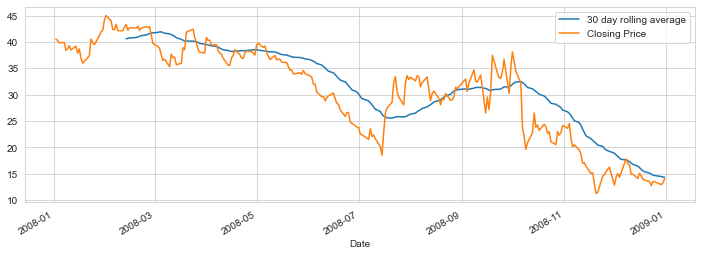

In [74]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day rolling average')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='Closing Price')
plt.legend()

### Correlations and Clusters

We will use seaborn heatmap to visualize correlation of banks' closing price

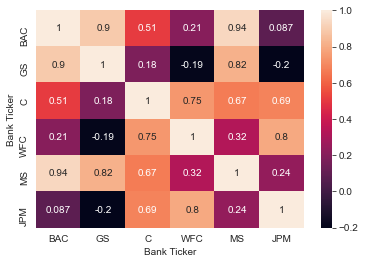

In [77]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Bank of America has a high correlation wiht Morgan Stanley. I wonder if they'd classified in the same cluster if I use a cluster map..

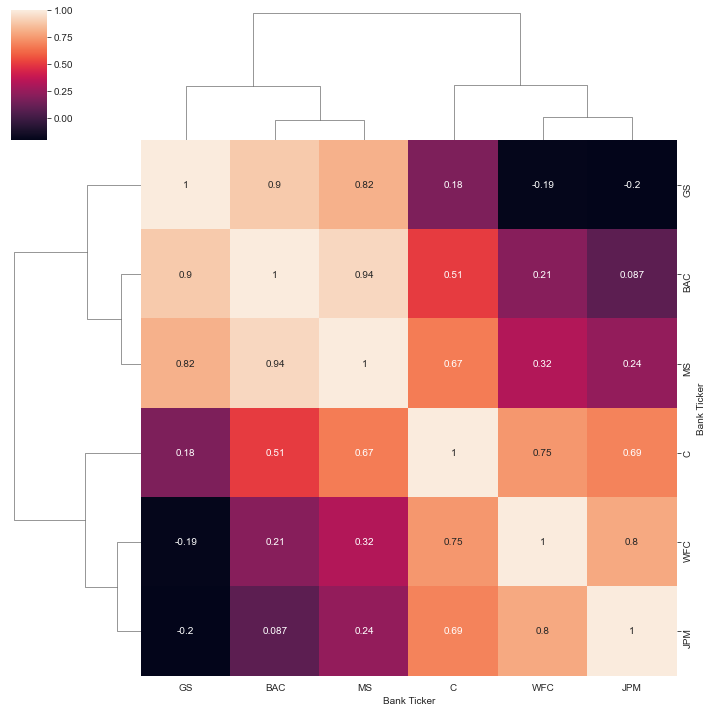

In [78]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Yep. They are. 

Cluster maps are a great way to visualize correlations among classes/variables.

#### Up next, we will perform Time Series forecasting on these banks.